# Wavelet Neural Network (Rede Neural baseada em Wavelets)

## Introdução

As redes neurais wavelet combinam a teoria das wavelets e as redes neurais. Uma rede neural wavelet consiste geralmente de uma rede neural de alimentação direta, com uma camada oculta, cujas funções de ativação são extraídas de uma família de wavelets.

Uma das aplicações das redes neurais wavelet é a **estimativa de funções**. Dada uma série de valores observados de uma função, uma rede wavelet pode ser treinada para aprender a composição dessa função e, assim, calcular um valor esperado para uma dada entrada.

## O que é uma Rede Neural Wavelet?

A estrutura de uma rede neural wavelet é muito semelhante à de uma rede neural MLP. Isto é, uma rede neural de avanço, recebendo uma ou mais entradas, com uma camada oculta e cuja camada de saída consiste em um ou mais combinadores lineares. A camada oculta consiste em neurônios, cujas funções de ativação são extraídas de uma base wavelet. Esses neurônios wavelet são geralmente chamados de _wavelons_.

Aqui estão duas abordagens principais para a criação de redes neurais wavelet:

- Na primeira, a wavelet e o processamento da rede neural são executados separadamente. O sinal de entrada é decomposto pela primeira vez usando alguma base wavelet pelos neurônios na camada oculta. Os coeficientes wavelet são, então, utilizados para modificar (atualizar) os pesos sinápticos de entrada de acordo com algum algoritmo de aprendizado.

- Na segundo, combina-se as duas teorias. Neste caso, a tradução e a dilatação das wavelets, juntamente com os pesos de de entrada, são modificadas de acordo com algum algoritmo de aprendizado.

Em geral, quando a primeira abordagem é utilizada, apenas as dilatações diádicas e as traduções da wavelet mãe formam a base da wavelet. Esse tipo de rede neural wavelet é geralmente chamado de wavenet. O segundo tipo é simplesmente chamado de rede wavelet.

## Características

- Não possui polarização ou limiar na camada oculta nem na camada de saída;

## Equações

### Computação no sentido direto

\begin{equation}
    net_j(n) = \sum_{i = 1}^{N_i} x_i(n) \cdotp t_{ji}
\end{equation}

A função de ativação é a derivada segunda da sigmóide, em relação ao seu argumento $\theta$, em que $\theta = \frac{net_j - t_{ji}}{r_j}$.

\begin{equation}
    y_j = \varphi(net_j) = \frac{d^2}{d\theta^2} sig(\theta)
\end{equation}

\begin{equation}
    z = \sum_{j = 1}^{N_h} a_j(n)y_j(n)
\end{equation}


### Computação do sentido reverso

\begin{equation}
    E(n) = \frac{1}{2} e(n)
\end{equation}

\begin{equation}
    e(n) = d(n) - z(n)
\end{equation}

### Ajuste das variáveis livres

#### Ajuste dos pesos $a_j$

\begin{equation}
    \Delta a_j = -\eta\bigtriangledown_{a_j} E = -\eta \frac{\partial E}{\partial a_j}
\end{equation}

Utilizando a regra da cadeia, calcula-se a derivada parcial:

\begin{equation}
    \frac{\partial E}{\partial a_j} = \frac{\partial E}{\partial e} \cdotp \frac{\partial e}{\partial z} \cdotp \frac{\partial z}{\partial a_j} = e \cdotp (-1) \cdotp y_j
\end{equation}

Portanto,

\begin{equation}
    \Delta a_j = \eta \cdotp e \cdotp \frac{d^2}{d\theta^2} sig(\theta)
\end{equation}

#### Ajuste dos centros $t_{ji}$

\begin{equation}
    \Delta t_{ji} = -\eta\bigtriangledown_{t_{ji}} E = -\eta \frac{\partial E}{\partial t_{ji}}
\end{equation}

Utilizando a regra da cadeia, calcula-se a derivada parcial:

\begin{equation}
    \frac{\partial E}{\partial t_{ji}} = \frac{\partial E}{\partial e} \cdotp \frac{\partial e}{\partial z} \cdotp \frac{\partial z}{\partial y_j} \cdotp \frac{\partial y_j}{\partial t_{ji}} = e \cdotp (-1) \cdotp a_j \cdotp \left[\frac{d^3}{d\theta^3}sig(\theta)\cdotp\left(\frac{-1}{r_j}\right)\right]
\end{equation}

É válido destacar que a derivada de $y_j$ em relação a $t_{ji}$ foi feita, primeiro, derivando a sigmóide em relação à variável $\theta$ e, em seguida, derivando a variável $\theta$ em relação a $t_{ji}$. Ou seja, aplicou-se também a regra da cadeia.

Assim, voltando à Equação do $\Delta t_{ji}$, temos:

\begin{equation}
    \Delta t_{ji} = -\eta\frac{e\cdotp a_j}{r_j}\cdotp \frac{d^3}{d\theta^3}sig(\theta)
\end{equation}

#### Ajuste das larguras (ou dilatações) $r_j$

\begin{equation}
    \Delta r_{j} = -\eta\bigtriangledown_{r_{j}} E = -\eta \frac{\partial E}{\partial r_{j}}
\end{equation}

Utilizando a regra da cadeia, calcula-se a derivada parcial:

\begin{equation}
    \frac{\partial E}{\partial r_{j}} = \frac{\partial E}{\partial e} \cdotp \frac{\partial e}{\partial z} \cdotp \frac{\partial z}{\partial y_j} \cdotp \frac{\partial y_j}{\partial r_{j}} = e \cdotp (-1) \cdotp a_j \cdotp \left[\frac{d^3}{d\theta^3}sig(\theta)\cdotp\left(-\frac{(net_j - t_{ji})}{r_j^2}\right)\right]
\end{equation}

Nesse caso, também é válido destacar que a derivada de $y_j$ em relação a $r_{j}$ foi feita, primeiro, derivando a sigmóide em relação à variável $\theta$ e, em seguida, derivando a variável $\theta$ em relação a $r_{j}$. Ou seja, aplicou-se também a regra da cadeia.

Assim, voltando à Equação do $\Delta r_{j}$, temos:

\begin{equation}
    \Delta r_{ji} = -\eta\frac{e\cdotp a_j \cdotp (net_j - t_{ji})}{r_j^2}\cdotp \frac{d^3}{d\theta^3}sig(\theta)
\end{equation}


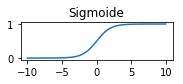

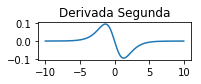

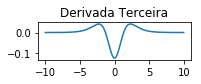

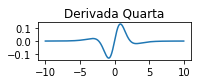

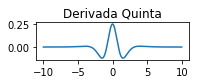

In [4]:
### Sigmóide e suas derivadas segunda e terceira

import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(-10, 10, 0.001)

plt.figure(0)
plt.subplot(521)
plt.plot(theta, (1 / (1 + np.exp(-theta))))
plt.title('Sigmoide')
plt.show()

plt.subplot(522)
plt.plot(theta, 2*(1 / (1 + np.exp(-theta)))**3 - 3*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta))))
plt.title('Derivada Segunda')
plt.show()

plt.subplot(523)
plt.plot(theta, -6*(1 / (1 + np.exp(-theta)))**4 + 12*(1 / (1 + np.exp(-theta)))**3 - 7*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta))))
plt.title('Derivada Terceira')
plt.show()

plt.subplot(524)
plt.plot(theta, 24*(1 / (1 + np.exp(-theta)))**5 - 60*(1 / (1 + np.exp(-theta)))**4 + 50*(1 / (1 + np.exp(-theta)))**3 - 15*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta))))
plt.title('Derivada Quarta')
plt.show()

plt.subplot(525)
plt.plot(theta, -120*(1 / (1 + np.exp(-theta)))**6 + 360*(1 / (1 + np.exp(-theta)))**5 - 390*(1 / (1 + np.exp(-theta)))**4 + 180*(1 / (1 + np.exp(-theta)))**3 - 31*(1 / (1 + np.exp(-theta)))**2 + (1 / (1 + np.exp(-theta))))
plt.title('Derivada Quinta')
plt.show()